<a href="https://colab.research.google.com/github/Weiweihere/Weiweihere/blob/main/rdf2vec_embedding_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
!pip install pyRDF2vec==0.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [2]:
!pip install nest_asyncio==1.5.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install rdflib==6.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyrdf2vec 0.2.3 requires matplotlib<4.0.0,>=3.4.2, but you have matplotlib 3.1.3 which is incompatible.


In [5]:
from rdflib import Graph, URIRef
from pyrdf2vec.graphs import KG
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.samplers import PageRankSampler
from pyrdf2vec.walkers import RandomWalker
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd

## Load libs and file

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

path="/content/drive/My Drive/Colab Notebooks/"
os.chdir(path)
os.listdir(path)

['healthcare-dataset-stroke-data.csv',
 'Copy of Stroke_Prediction_v1.ipynb',
 'Lab1__RS_for_movies.ipynb',
 'DM01-Exercise-DataPreprocessing-V1.ipynb',
 'eval_function.ipynb',
 'Untitled0.ipynb',
 'Copy of 02_basics.ipynb',
 'DM2',
 'Copy of 01_basics.ipynb',
 'KG',
 'KG_lecture_project',
 'results_embedding_venue_label.csv',
 'Venues related to embedding.png',
 'Venues related to embedding.svg',
 'HALwalk_rdf2vec_embedding_count.ipynb',
 'result_embedding.ttl',
 'Fixed_rdf2vec_embedding_count.ipynb']

In [8]:
import networkx as nx

In [9]:
ttl_path = "/content/drive/MyDrive/Colab Notebooks/KG/result_embedding.ttl"

In [10]:
from rdflib import Graph
g = Graph()
g.parse(ttl_path)
print(len(g))

79382


In [11]:
# degree_freq = nx.degree_histogram(g)
# degrees = range(len(degree_freq))
# plt.figure(figsize=(12, 8)) 
# plt.loglog(degrees[3:], degree_freq[3:],'go-') 
# plt.xlabel('Degree')
# plt.ylabel('Frequency')

In [12]:
from rdflib import Graph, Literal, RDF, URIRef
pred_creator = URIRef("http://purl.org/dc/terms/creator")
pred_hasconcept = URIRef("https://semopenalex.org/property/hasConcept")
pred_hasHostVenue = URIRef("https://semopenalex.org/property/hasHostVenue")
pred_hasVenue = URIRef("https://semopenalex.org/property/hasVenue")

In [13]:
works = set()
for rdf_work in g.subjects():
  works.add(rdf_work)
print(rdf_work)
print(len(works))

https://semopenalex.org/work/W3001623914
27051


In [14]:
authors = set()
concepts = set()
conferences = set()
hostvenues =set()

In [15]:
for rdf_hostvenue in g.objects(predicate=pred_hasHostVenue):
  hostvenues.add(rdf_hostvenue)
print(len(hostvenues))
print(rdf_hostvenue)

12589
https://semopenalex.org/hostvenue/W2241881656V2765045311


In [16]:
for rdf_author in g.objects(predicate=pred_creator):
  authors.add(rdf_author)
print(len(authors))
print(rdf_author)

21594
https://semopenalex.org/author/A2248963867


In [17]:
for rdf_concept in g.objects(predicate=pred_hasconcept):
  concepts.add(rdf_concept)
print(len(concepts))
print(rdf_concept)

3
https://semopenalex.org/concept/C108801101


In [18]:
for rdf_venue in g.objects(predicate=pred_hasVenue):
  conferences.add(rdf_venue)
print(len(conferences))
print(rdf_venue)


1870
https://semopenalex.org/venue/V2596517720


In [19]:
authors_list = [str(author) for author in authors]
works_list = [str(work) for work in works]
conference_list = [str(conference) for conference in conferences]

# entities = conference_list


In [20]:
# entities[0:1]

In [21]:
# entities[-6:-1]

In [22]:
from pyrdf2vec.graphs import KG
knowledge_graph = KG(ttl_path)

In [23]:
pip install networkx --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyrdf2vec 0.2.3 requires matplotlib<4.0.0,>=3.4.2, but you have matplotlib 3.1.3 which is incompatible.
pyrdf2vec 0.2.3 requires networkx<3.0.0,>=2.5.1, but you have networkx 3.0 which is incompatible.


In [24]:
pip install scipy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Train RDF2Vec

In [25]:
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.samplers import PageRankSampler
from pyrdf2vec.walkers import RandomWalker

transformer = RDF2VecTransformer(
    Word2Vec(),
    walkers=[RandomWalker(4, 10, PageRankSampler())],
     #verbose=1
)
embeddings, literals = transformer.fit_transform(knowledge_graph,conference_list)

In [26]:
len(embeddings)

1870

In [27]:
print(len(embeddings[0]))
embeddings[0]

100


array([ 4.8437174e-03, -1.5014266e-03,  3.3159385e-04, -1.3348007e-03,
       -1.5400370e-03, -3.8949237e-03,  1.8742647e-03,  7.9630828e-04,
       -2.0424668e-03, -1.2147250e-03, -1.8750681e-04, -2.9121183e-03,
        4.3038353e-03, -2.3916103e-03,  1.5723318e-04, -7.9441530e-04,
       -1.9377982e-04,  4.9505485e-03,  4.7101909e-03, -3.4170381e-03,
        1.5398987e-03,  1.8204275e-03,  3.4650213e-03, -4.7778548e-03,
       -2.4682737e-03, -2.8029711e-03, -4.1244510e-03, -4.0268330e-03,
       -2.0012138e-03,  1.0641166e-03,  2.9948279e-03, -4.5935642e-03,
        1.1624333e-03, -2.7351002e-03,  3.5869752e-03, -8.6133135e-05,
       -3.9910688e-03,  1.9363126e-03,  4.8083239e-03,  8.2847802e-04,
       -2.4597952e-03, -4.9114637e-03,  2.1820422e-03,  4.2737718e-03,
       -1.3043040e-03,  4.7967938e-04, -3.6916803e-03, -2.7371841e-03,
       -1.7370314e-03,  1.0542221e-03,  1.8309681e-03, -2.7084104e-03,
       -5.7784212e-04, -4.1911677e-03, -1.5598900e-03,  5.6305248e-04,
      

## Dimensionality reduction

In [28]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from requests import request
import pandas as pd


In [29]:
pca = PCA(n_components=2)
reduced_conference_embeddings = pca.fit_transform(embeddings)

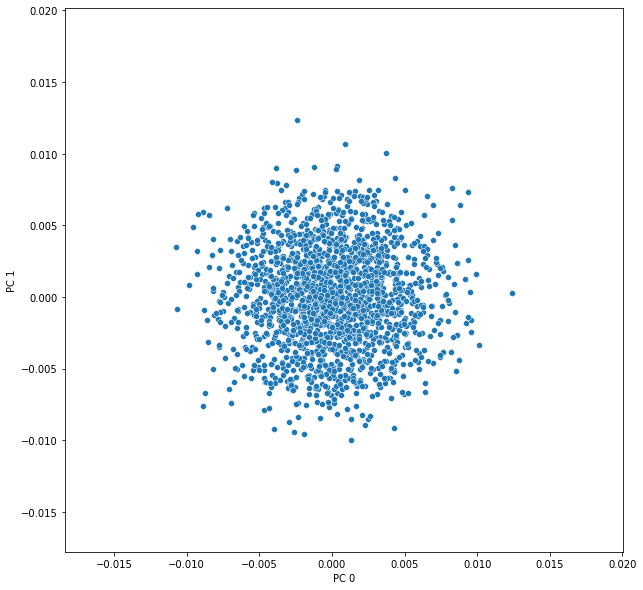

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,10))

conference_df = pd.DataFrame(
    reduced_conference_embeddings, 
    columns=["PC 0", "PC 1"], 
    index=conference_list
)
sns.scatterplot(data=conference_df, x='PC 0', y='PC 1')

In [31]:
concept_labels = pd.read_csv(
    '/content/drive/MyDrive/Colab Notebooks/KG/results_embedding_venue_label.csv',
    # delimiter='\t', 
    # encoding='latin-1',
     index_col=0,
)
concept_labels.head()



,conferenceLabel
conference,
https://semopenalex.org/venue/V74100341,Opto-electronics Review
https://semopenalex.org/venue/V74100341,Opto-electronics Review
https://semopenalex.org/venue/V74100341,Opto-electronics Review
https://semopenalex.org/venue/V192650101,Information Sciences
https://semopenalex.org/venue/V192650101,Information Sciences


In [32]:
concept_labels = concept_labels.drop_duplicates()

In [33]:
print(concept_labels)

                                                                        conferenceLabel
conference                                                                             
https://semopenalex.org/venue/V74100341                         Opto-electronics Review
https://semopenalex.org/venue/V192650101                           Information Sciences
https://semopenalex.org/venue/V106296714              Lecture Notes in Computer Science
https://semopenalex.org/venue/V4210195117                               IEE proceedings
https://semopenalex.org/venue/V414566                               Pattern Recognition
...                                                                                 ...
https://semopenalex.org/venue/V2764481197           The Journal of Engineering Research
https://semopenalex.org/venue/V27723657               IEEE Photonics Technology Letters
https://semopenalex.org/venue/V158759456             portal - Libraries and the Academy
https://semopenalex.org/venue/V2

In [34]:
concept_labels['conferenceLabel']

conference
https://semopenalex.org/venue/V74100341                           Opto-electronics Review
https://semopenalex.org/venue/V192650101                             Information Sciences
https://semopenalex.org/venue/V106296714                Lecture Notes in Computer Science
https://semopenalex.org/venue/V4210195117                                 IEE proceedings
https://semopenalex.org/venue/V414566                                 Pattern Recognition
                                                                 ...                     
https://semopenalex.org/venue/V2764481197             The Journal of Engineering Research
https://semopenalex.org/venue/V27723657                 IEEE Photonics Technology Letters
https://semopenalex.org/venue/V158759456               portal - Libraries and the Academy
https://semopenalex.org/venue/V2764647083    Mineral Processing and Extractive Metallurgy
https://semopenalex.org/venue/V2596517720                                   arXiv: Optics

In [35]:
concept_labels.head()

,conferenceLabel
conference,
https://semopenalex.org/venue/V74100341,Opto-electronics Review
https://semopenalex.org/venue/V192650101,Information Sciences
https://semopenalex.org/venue/V106296714,Lecture Notes in Computer Science
https://semopenalex.org/venue/V4210195117,IEE proceedings
https://semopenalex.org/venue/V414566,Pattern Recognition


In [36]:
# has_venue = URIRef('https://semopenalex.org/property/hasVenue')--pre_hasVenue
# has_hostvenue = URIref('https://semopenalex.org/property/hasHostVenue')--pre_hasHostVenue
from rdflib import Graph, Literal, RDF, URIRef
pred_creator = URIRef("http://purl.org/dc/terms/creator")
pred_hasconcept = URIRef("https://semopenalex.org/property/hasConcept")
pred_hasHostVenue = URIRef("https://semopenalex.org/property/hasHostVenue")
pred_hasVenue = URIRef("https://semopenalex.org/property/hasVenue")

In [37]:
all_works = []
all_venue = []

for work, rdf_predicate, venue in g.triples((None,pred_hasVenue, None)):
    all_works.append(str(work))
    all_venue.append(str(venue))

hostvenue_works = pd.DataFrame({
    "work": all_works,
    "venue": all_venue,
})

works_per_venue = hostvenue_works.groupby(by=['venue']).count()
works_per_venue['log_work'] = works_per_venue['work'].apply(math.log2)
print(works_per_venue)


                                           work  log_work
venue                                                    
https://semopenalex.org/venue/V1001844925     1  0.000000
https://semopenalex.org/venue/V1003953879     3  1.584963
https://semopenalex.org/venue/V100554201     32  5.000000
https://semopenalex.org/venue/V100666833     18  4.169925
https://semopenalex.org/venue/V1010394304     2  1.000000
...                                         ...       ...
https://semopenalex.org/venue/V98026630       1  0.000000
https://semopenalex.org/venue/V98502992       1  0.000000
https://semopenalex.org/venue/V98565333       2  1.000000
https://semopenalex.org/venue/V991499945      1  0.000000
https://semopenalex.org/venue/V99347777       2  1.000000

[1870 rows x 2 columns]


In [38]:
print(all_venue[0])
print(all_works[0])

https://semopenalex.org/venue/V74100341
https://semopenalex.org/hostvenue/W1990829742V74100341


In [39]:
works_per_venue['label'] = concept_labels['conferenceLabel']

works_per_venue = pd.merge(
    conference_df, 
    works_per_venue,
    left_index=True, 
    right_index=True,
)

works_per_venue

,PC 0,PC 1,work,log_work,label
https://semopenalex.org/venue/V4210220727,-0.004624,0.004014,1,0.000000,International journal of informatics and appli...
https://semopenalex.org/venue/V2898368220,-0.003416,-0.004543,1,0.000000,ICT Express
https://semopenalex.org/venue/V178238111,0.000149,-0.000246,20,4.321928,Mathematical Problems in Engineering
https://semopenalex.org/venue/V2764571765,0.002972,-0.005740,1,0.000000,Hunan Agricultural Machinery
https://semopenalex.org/venue/V2764697050,-0.003479,-0.001800,2,1.000000,Theoretical & Applied Science
...,...,...,...,...,...
https://semopenalex.org/venue/V130700065,0.004865,-0.004640,1,0.000000,International Journal of Technology and Human ...
https://semopenalex.org/venue/V4210206115,0.002483,0.001475,1,0.000000,Africa research journal
https://semopenalex.org/venue/V2765052175,0.002146,-0.002160,1,0.000000,International Journal of Data Mining & Knowled...
https://semopenalex.org/venue/V4210224527,-0.002093,-0.000200,4,2.000000,Transactions on emerging telecommunications te...


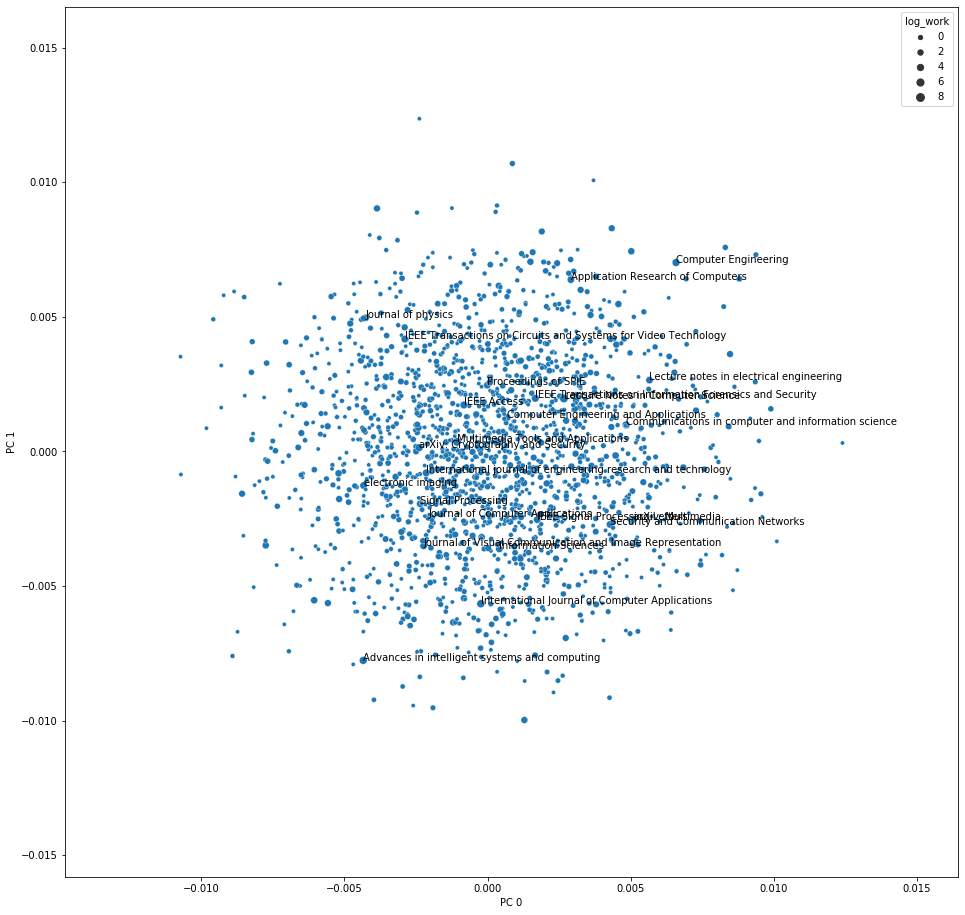

In [40]:
plt.figure(figsize=(16, 16))
sns.scatterplot(
    data=works_per_venue, 
    x='PC 0', 
    y='PC 1',
    size='log_work',
)

for i, txt in enumerate(works_per_venue['label'].values):
    if works_per_venue['log_work'][i] >6:
        plt.annotate(
            txt, 
            (works_per_venue['PC 0'][i], works_per_venue['PC 1'][i]), 
            fontsize=10,
        )